In [26]:
import joblib
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [27]:
# Cargar el conjunto de datos de prueba desde el archivo CSV
df_test = pd.read_csv("../data/wines_test.csv")

# Mostrar el DataFrame cargado
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.320,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,5,white
1,6.6,0.340,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7,white
2,6.4,0.320,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,12.5,8,white
3,6.8,0.230,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6,white
4,6.7,0.340,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.2,7,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5,white
1296,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,red
1297,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,7,red
1298,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,red


# PREDICCIONES MODELO CLASIFICACIÓN ELEGIDO EN TEST 

In [28]:
target_clf = "quality"

y_test_clf = df_test["quality"]

In [29]:
# Recuperamos el modelo de pipelines (version pickle)
with open('../models/modelo_pipeline_cat.pkl', 'rb') as archivo: # ojo read binario
    modelo_pipeline_clf = pickle.load(archivo)

In [30]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.320,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,5,white
1,6.6,0.340,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7,white
2,6.4,0.320,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,12.5,8,white
3,6.8,0.230,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6,white
4,6.7,0.340,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.2,7,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5,white
1296,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,red
1297,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,7,red
1298,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,red


In [31]:
modelo_pipeline_clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocesado',
                                        Pipeline(steps=[('first_stage',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('Process_Numeric',
                                                                                          Pipeline(steps=[('Impute_Mean',
                                                                                                           SimpleImputer()),
                                                                                                          ('logaritmo',
                                                                                                           FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                               func=<ufunc 'log1p'>)),
                                                                                                          ('SScaler',
                                                                                                           StandardScaler())]),
                                                                                          ['volatile '
                                                                                           'acidity...
                                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                                          ['class']),
                                                                                         ('Exclude',
                                                                                          'drop',
                                                                                          ['fixed '
                                                                                           'acidity',
                                                                                           'residual '
                                                                                           'sugar',
                                                                                           'quality'])]))])),
                                       ('Modelo', LGBMClassifier(verbose=-1))]),
             n_jobs=-1,
             param_grid={'Modelo__learning_rate': [0.01, 0.05, 0.1],
                         'Modelo__max_depth': [5, 10, 15],
                         'Modelo__n_estimators': [50, 100, 200],
                         'Modelo__num_leaves': [15, 31, 50]},
             scoring='accuracy', verbose=1)

In [32]:
print(classification_report(y_test_clf, modelo_pipeline_clf.predict(df_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.82      0.21      0.33        43
           5       0.72      0.71      0.71       432
           6       0.64      0.72      0.68       562
           7       0.57      0.56      0.56       210
           8       0.85      0.49      0.62        47

    accuracy                           0.66      1300
   macro avg       0.60      0.45      0.48      1300
weighted avg       0.67      0.66      0.65      1300



c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


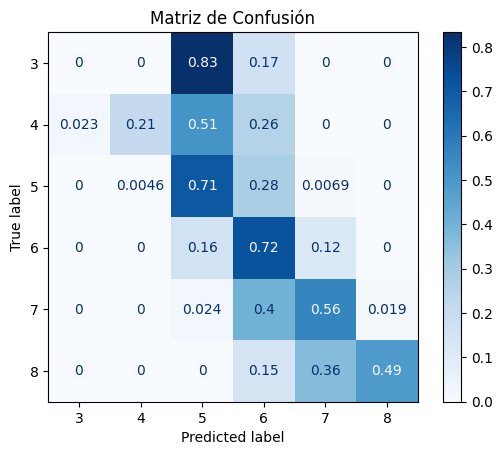

In [41]:
# Visualización de la Matriz de Confusión

# Predicción de valores de prueba
#    - "y_predict_clf": Valores predichos por el modelo para los datos de prueba (df_test).

y_predict_clf = modelo_pipeline_clf.predict(df_test)

# Gráfico de Matriz de Confusión → Muestra el desempeño del modelo clasificando las distintas clases.
#    - "y_test_clf": Valores reales de la clasificación.
#    - "y_predict_clf": Valores predichos por el modelo.
#    - "normalize='true'": Normaliza los valores por fila, mostrando proporciones en lugar de conteos absolutos.
#    - "cmap='Blues'": Utiliza una escala de colores azul para facilitar la visualización.

disp = ConfusionMatrixDisplay.from_predictions(y_test_clf, y_predict_clf, normalize="true", cmap="Blues")

# Configuración del gráfico
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
# Accuracy (66%): No está mal, pero no es excelente. Puede mejorarse con un mejor balance de clases o ajuste del modelo.
# Macro Avg (promedio sin ponderar):
# Precisión (0.60) > Recall (0.45) → El modelo prefiere ser preciso en ciertas clases pero no cubre bien todas las categorías.
# Weighted Avg (ponderado por el tamaño de cada clase):
# F1-score 0.65, lo que indica que en general el modelo no está mal, pero hay sesgos.

# PREDICCIÓN MODELO REGRESIÓN EN TEST

In [35]:
target_reg = "alcohol"

y_test_reg = df_test["alcohol"]

In [36]:
# Recuperamos el modelo de pipelines (version pickle)
with open('../models/modelo_pipeline_reg.pkl', 'rb') as archivo: # ojo read binario
    modelo_pipeline_reg = pickle.load(archivo)

In [37]:
modelo_pipeline_reg

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocesado',
                                        Pipeline(steps=[('first_stage',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('Process_Numeric',
                                                                                          Pipeline(steps=[('Impute_Mean',
                                                                                                           SimpleImputer()),
                                                                                                          ('logaritmo',
                                                                                                           FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                               func=<ufunc 'log1p'>)),
                                                                                                          ('SScaler',
                                                                                                           StandardScaler())]),
                                                                                          ['density',
                                                                                           'residua...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'Modelo__learning_rate': [0.1, 0.2, 0.5, 1.0],
                         'Modelo__max_depth': [1, 2, 4, 8],
                         'Modelo__n_estimators': [10, 100, 200, 400]},
             scoring='neg_mean_absolute_percentage_error')

In [38]:
# Evaluación del Modelo de Regresión

# modelo_pipeline_reg → Modelo entrenado con pipeline de regresión.
#    - Contiene los pasos de preprocesamiento y el modelo final entrenado.
#    - Se utiliza para generar predicciones en el conjunto de prueba.

# Cálculo de métricas → Se evalúa el desempeño del modelo con tres métricas clave.
#    - "RMSE (Root Mean Squared Error)": Mide el error cuadrático medio de las predicciones.
#    - "MAE (Mean Absolute Error)": Representa el error absoluto medio entre los valores reales y predichos.
#    - "R² (Coeficiente de Determinación)": Indica qué porcentaje de la variabilidad de los datos explica el modelo.

y_pred_reg = modelo_pipeline_reg.predict(df_test)  # Generar predicciones sobre el conjunto de prueba

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))  # Cálculo de RMSE
mae = mean_absolute_error(y_test_reg, y_pred)  # Cálculo de MAE
r2 = r2_score(y_test_reg, y_pred)  # Cálculo del coeficiente de determinación R²

# Mostrar resultados en formato estructurado
print("Evaluación del Modelo de Regresión")
print(f"{'RMSE (Error Cuadrático Medio)':<35}{rmse:.4f}")
print(f"{'MAE (Error Absoluto Medio)':<35}{mae:.4f}")
print(f"{'R² (Coeficiente de Determinación)':<35}{r2:.4f}")

Evaluación del Modelo de Regresión
RMSE (Error Cuadrático Medio)      4.7563
MAE (Error Absoluto Medio)         4.6434
R² (Coeficiente de Determinación)  -15.0521


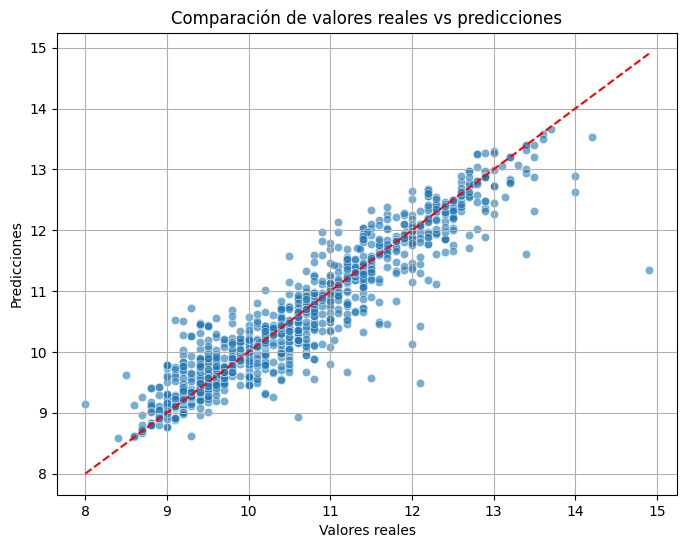

In [39]:
# Visualización de resultados

# Gráfico de dispersión → Muestra la relación entre los valores reales y las predicciones.
#    - "x": Valores reales (y_test_reg)
#    - "y": Valores predichos (y_pred)
#    - La línea roja discontinua representa la predicción perfecta.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color="red", linestyle="--")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales vs predicciones")
plt.grid(True)
plt.show()